# Model training for the project

# imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import os

# ✅ 2. Load Datasets

In [3]:
dataset_path = '../dataset/dataset.csv'  # Symptom_Details.csv
symptom_description_path = '../dataset/symptom_Description.csv'
symptom_severity_path = '../dataset/Symptom-severity.csv'
symptom_precaution_path = '../dataset/symptom_precaution.csv'

dataset_df = pd.read_csv(dataset_path)
symptom_severity_df = pd.read_csv(symptom_severity_path)
precaution_df=pd.read_csv(symptom_precaution_path)

In [4]:
# Build symptom vocab from severity file
symptom_vocab = sorted(symptom_severity_df['Symptom'].str.lower().str.strip().unique())
symptom_index = {symptom: idx for idx, symptom in enumerate(symptom_vocab)}

In [5]:
symptom_severity_df[symptom_severity_df['Symptom']=='fluid_overload']

,Symptom,weight
45,fluid_overload,6
117,fluid_overload,4


# Function to encode a row of symptoms into multi-hot vector

In [6]:
def encode_symptoms(row):
    vector = [0] * len(symptom_vocab)
    for col in row:
        if pd.notna(col):
            symptom = col.strip().lower()
            if symptom in symptom_index:
                vector[symptom_index[symptom]] = 1
    return vector


# Prepare features and labels

In [7]:

X = []
y = []
for i, row in dataset_df.iterrows():
    disease = row.iloc[0]                     # Disease name
    symptoms = row.iloc[1:]                   # Symptoms (Symptom_1 to Symptom_n)
    
    print(f"\nRow {i+1}")
    print(f"Disease: {disease}")
    # print("Raw Symptoms:", list(symptoms.values))
    
    encoded = encode_symptoms(symptoms)       # Convert to multi-hot
    print("Encoded Vector (1s for present symptoms):")
    print(encoded)
    
    X.append(encoded)
    y.append(disease)

# Convert and encode labels
X = np.array(X)
le = LabelEncoder()
y_encoded = le.fit_transform(y)




Row 1
Disease: Fungal infection
Encoded Vector (1s for present symptoms):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Row 2
Disease: Fungal infection
Encoded Vector (1s for present symptoms):
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Row 3
Disease: Fungal infection
Encoded Vector (1s for 

In [8]:
# 1. Extract all unique symptoms from dataset_df (Symptom_1 to Symptom_17)
all_symptoms = pd.unique(dataset_df.iloc[:, 1:].values.ravel())
all_symptoms = [str(sym).strip().lower().replace(" ", "_") for sym in all_symptoms if pd.notna(sym)]

# 2. Sort and de-duplicate
vocab = sorted(set(all_symptoms))  # unified vocab of length 132
vocab_index_map = {symptom: idx for idx, symptom in enumerate(vocab)}

# 3. Prepare severity map (assign 0 if missing)
symptom_severity_df['Symptom'] = symptom_severity_df['Symptom'].str.strip().str.lower().str.replace(" ", "_")
severity_map = dict(zip(symptom_severity_df['Symptom'], symptom_severity_df['weight']))

# 4. Define both encoders using the same vocab
def encode_symptoms(symptoms):  # multi-hot
    vec = np.zeros(len(vocab))
    for sym in symptoms:
        sym = str(sym).strip().lower().replace(" ", "_")
        if sym in vocab_index_map:
            vec[vocab_index_map[sym]] = 1
    return vec

def encode_with_severity(symptoms):
    vec = np.zeros(len(vocab))
    for sym in symptoms:
        sym = str(sym).strip().lower().replace(" ", "_")
        if sym in vocab_index_map:
            vec[vocab_index_map[sym]] = severity_map.get(sym, 0)
    return vec


In [9]:
#n = 132 unique symptoms
X
n=X.shape[0]
l=list(X[n-1])
len(l)

132

In [10]:
# Create vocab and index map
all_symptoms = pd.unique(dataset_df.iloc[:, 1:].values.ravel())
vocab = sorted([str(s).strip().lower().replace(" ", "_") for s in all_symptoms if str(s) != "nan"])
vocab_index_map = {symptom: idx for idx, symptom in enumerate(vocab)}


In [11]:
len(vocab_index_map)

131

In [12]:
# Create symptom-to-severity mapping
# Create severity map
severity_map = dict(zip(symptom_severity_df['Symptom'].str.strip().str.lower().str.replace(" ", "_"), 
                        symptom_severity_df['weight']))

# Encode function with severity
def encode_symptoms_with_severity(symptoms):
    vector = np.zeros(len(vocab))  # vocab from unique symptoms
    for symptom in symptoms:
        symptom = str(symptom).strip().lower().replace(" ", "_")
        if symptom in vocab_index_map:
            idx = vocab_index_map[symptom]
            vector[idx] = severity_map.get(symptom, 0)  # fallback to 0 if missing
    return vector


In [13]:
X = []
y = []

for i, row in dataset_df.iterrows():
    disease = row.iloc[0]
    symptoms = row.iloc[1:]

    encoded = encode_symptoms_with_severity(symptoms)  # use severity
    X.append(encoded)
    y.append(disease)

X = np.array(X)


In [14]:
X.shape

(4920, 131)

In [15]:
precaution_df.columns

Index(['Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4'],
      dtype='object')

In [16]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=7)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
X_train.shape


(3296, 131)

In [18]:
dataset_df.head(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Accuracy
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")

Model Accuracy: 1.00


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=7)

# Model training using K-Nearest Neighbors
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Prediction and accuracy
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (KNN): {acc:.2f}")


Model Accuracy (KNN): 1.00


In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))


Accuracy: 1.0


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=7)

# Models
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),  # Good for LR
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Naive Bayes": Pipeline([
        ("clf", MultinomialNB())  # No scaling needed
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),  # Needed for SVM
        ("clf", SVC())
    ])
}

# Train + Evaluate
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 1.00
Naive Bayes Accuracy: 1.00
SVM Accuracy: 1.00


In [35]:
# Save model and helpers
os.makedirs('model', exist_ok=True)
joblib.dump(clf, 'model/model.pkl')
joblib.dump(le, 'model/label_encoder.pkl')
joblib.dump(symptom_vocab, 'model/symptom_vocab.pkl')

print("✅ Model and encoders saved in /model folder")

✅ Model and encoders saved in /model folder


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y_encoded, cv=5)
print("Cross-val accuracy (mean):", scores.mean())


Cross-val accuracy (mean): 1.0


In [24]:
import random

# Randomly shuffle symptoms between similar diseases
def add_noise(df, prob=0.1):
    for idx, row in df.iterrows():
        for i in range(1, 18):  # Symptom_1 to Symptom_17
            if pd.notna(row[f"Symptom_{i}"]) and random.random() < prob:
                # Pick a random symptom from another row
                rand_symptom = df.sample(1)[f"Symptom_{i}"].values[0]
                df.at[idx, f"Symptom_{i}"] = rand_symptom
    return df

dataset_df_noisy = add_noise(dataset_df.copy(), prob=0.2)


In [25]:
dataset_df_limited = dataset_df.copy()
for i in range(6, 18):  # Remove Symptom_6 to Symptom_17
    dataset_df_limited[f"Symptom_{i}"] = None


In [26]:
dup = dataset_df[dataset_df['Disease'] == 'Typhoid'].copy()
dup['Disease'] = 'Typhoid_variant'
dataset_df_aug = pd.concat([dataset_df, dup], ignore_index=True)


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.33, random_state=7)

# Models
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),  # Good for LR
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "Naive Bayes": Pipeline([
        ("clf", MultinomialNB())  # No scaling needed
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),  # Needed for SVM
        ("clf", SVC())
    ])
}

# Train + Evaluate
for name, pipeline in models.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 1.00
Naive Bayes Accuracy: 1.00
SVM Accuracy: 1.00


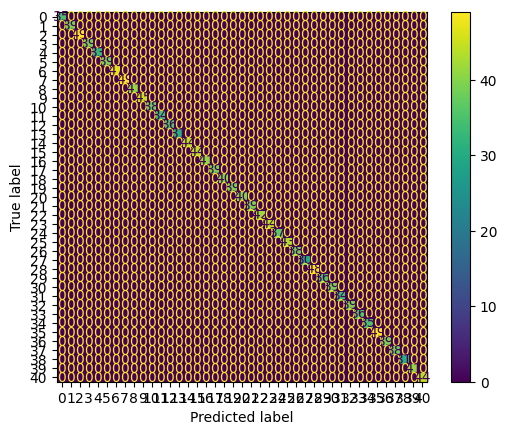

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)


In [30]:
from collections import Counter

symptom_disease_map = {}
for _, row in dataset_df.iterrows():
    symptoms = tuple(sorted([s for s in row[1:] if pd.notna(s)]))
    disease = row[0]
    symptom_disease_map.setdefault(symptoms, set()).add(disease)

ambiguous_cases = {k: v for k, v in symptom_disease_map.items() if len(v) > 1}
print("Ambiguous symptom sets:", len(ambiguous_cases))


C:\Users\Arun Kumar\AppData\Local\Temp\ipykernel_7548\3458307568.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  disease = row[0]


Ambiguous symptom sets: 0


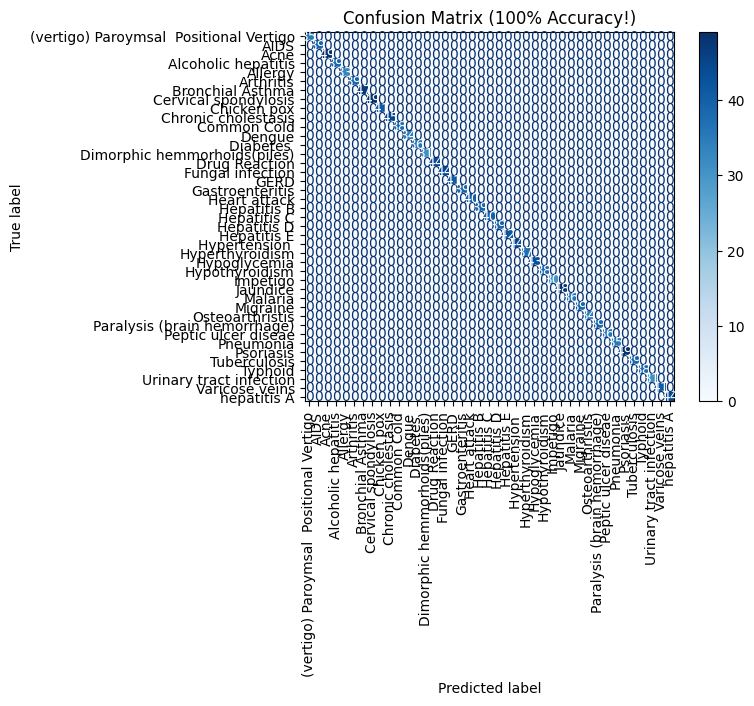

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix (100% Accuracy!)")
plt.show()


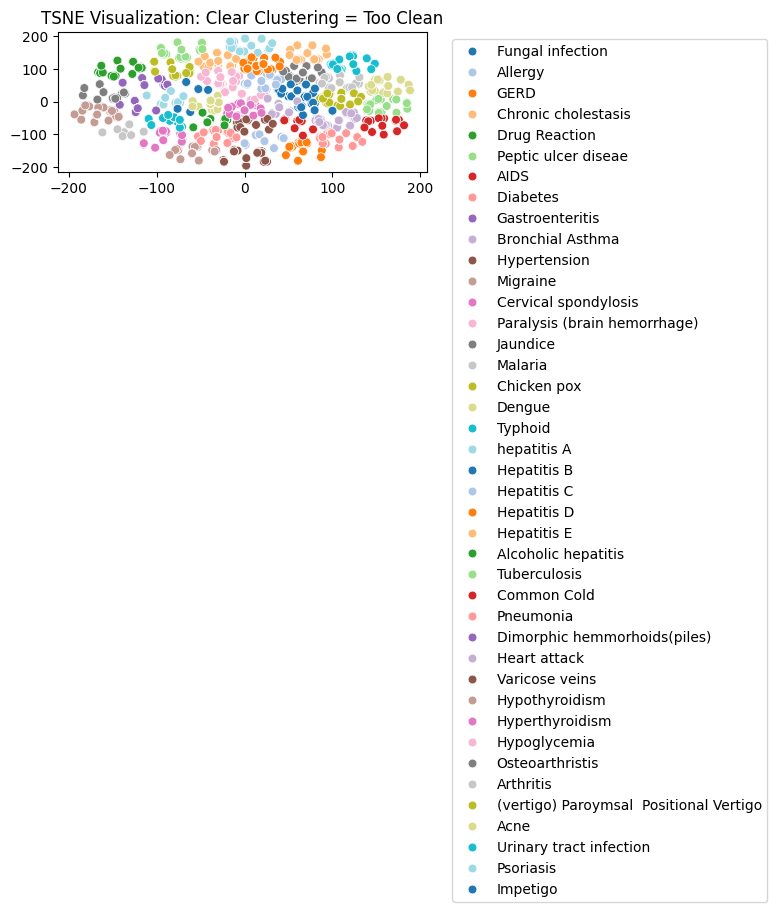

In [32]:
from sklearn.manifold import TSNE
import seaborn as sns

X_vis = TSNE(n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=le.inverse_transform(y_encoded), palette='tab20', s=40)
plt.title("TSNE Visualization: Clear Clustering = Too Clean")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


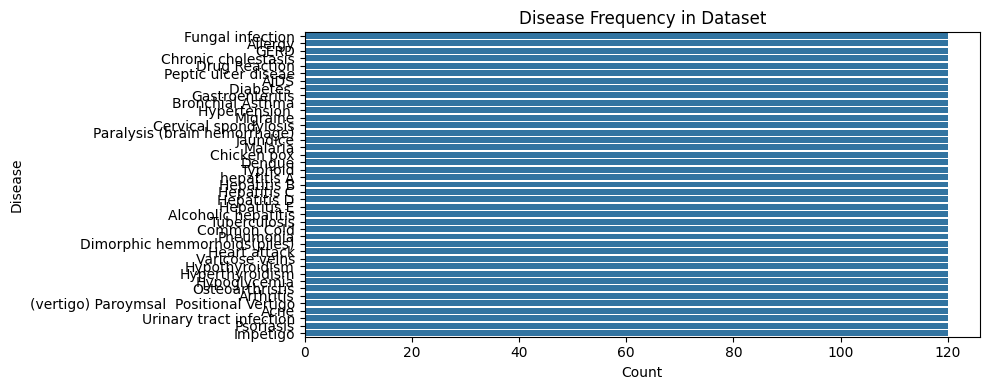

In [33]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.countplot(y=dataset_df['Disease'], order=dataset_df['Disease'].value_counts().index)
plt.title("Disease Frequency in Dataset")
plt.xlabel("Count")
plt.tight_layout()
plt.show()


In [34]:
import os
import joblib
from datetime import datetime

def save_model(clf, directory='../models', prefix='model'):
    """
    Save the model to the specified directory with a timestamped filename.
    
    Parameters:
    - clf: The trained model to be saved.
    - directory: The relative path to the directory where the model should be saved.
                 Default is '../models', moving up one level from the current directory.
    - prefix: The prefix of the filename, typically representing the model type or name.
    
    Returns:
    - model_path: The path to where the model was saved.
    """
    os.makedirs(directory, exist_ok=True)  # Ensure the directory exists

    current_date = datetime.now().strftime("%Y%m%d")
    model_filename = f"{prefix}_{current_date}.pkl"

    model_path = os.path.join(directory, model_filename)
    joblib.dump(clf, model_path)

    print(f"✔ Model saved as {model_filename} in {directory} directory.")
    return model_path

# Example usage
# clf is your trained model variable
# model_path = save_model(clf)
